# Supercell

In [1]:
import moire_functions as moire
import numpy as np
import drawSvg as draw
from myst_nb import glue

## Monolayer supercell

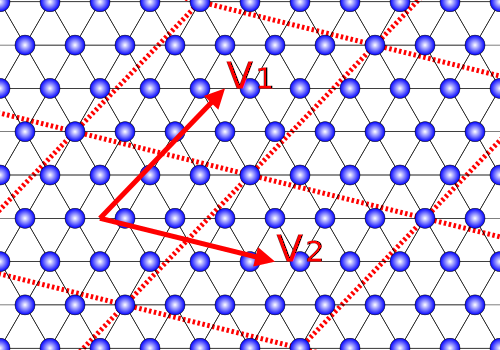

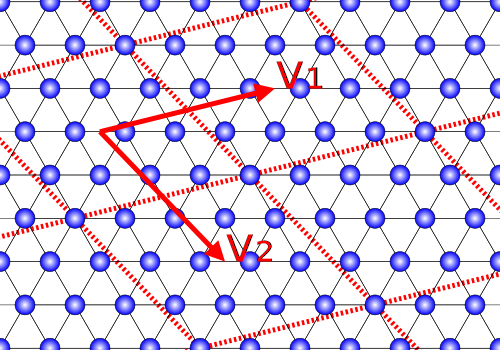

In [2]:
m, n = 3, 1
for index in [(n, m), (m, n)]:
    width, height = 10, 7
    layer = moire.Supercell(*index)
    lattice = layer.lattice(width, height, rotate=False, NN_intralayer=True)
    drawing = draw.Drawing(width, height, origin="center")
    drawing.append(lattice.draw_unit_cell(stroke='red', stroke_width=0.1, stroke_dasharray="0.05,0.05"))
    drawing.append(lattice.draw_lattice())
    drawing.append(lattice.draw_lattice_vectors(vec_symbols=['v₁', 'v₂'], origin=-sum(lattice.a), color='red', stroke_width=0.1))
    drawing.setRenderSize(500)
    glue("fig:lattice"+str(index[0])+str(index[1]), drawing)

We construct a supercell by spanning a parallelogram with integer multiples of the unit cell vectors $a_1$ and $a_2$:

$$
\vec v_1=m\vec a_1+n\vec a_2\text{ and } \vec v_2= (n+m)\vec a_1-m\vec a_2,
$$

which result in reciprocal lattice vectors:

```{math}
:label: eq:reciprocal_supercell
\vec w_1=\frac{m\vec b_1+(n+m)\vec b_2}{n^2+nm+m^2}\text{ and } \vec w_2=\frac{n\vec b_1-m\vec b_2}{n^2+nm+m^2}
```
with $m$ and $n$ arbitrary integers. We choose to include only the atom at the origin of these vectors in the supercell, all other corners belong to other supercells. We require $m$ and $n$ to be coprime to prevent other atoms falling on the border. Exchanging the two integers $m$ and $n$ results in a mirrored version of the supercell which we will use for the bilayer.

````{tabbed} Supercell for $n=1$, $m=3$
```{glue:figure} fig:lattice13
:name: fig:lattice13
Supercell for $n=1$ and $m=3$, only one corner atom is included in unit cell.
```
````
````{tabbed} Supercell for $n=3$, $m=1$
```{glue:figure} fig:lattice31
:name: fig:lattice31
Supercell for $n=3$ and $m=1$, only one corner atom is included in unit cell.
```
````

### Nearest neighbors

Our next task is to find the nearest neighbors (NN) of all atoms within the supercell. We follow the following procedure:

```{admonition} Pseudo code for interlayer NN algorithm
**for** atom i **in** supercell, hopping vector $h$ **in** $\{\pm\vec a_1, \pm\vec a_2, \pm(\vec a_2-\vec a_1)\}$:
> **for** atom j **in** supercell:
>> displacement vector = position(atom i) - position(atom j)  
>>**if** displacement vector == hopping vector $h$:  
>>>```atom i and atom j are NN for hopping vector h```  
>>> NN_list [i, $h$] = j  
>>>**break** for loop  
>  
>**if** no NN found:
>>```NN in other supercell```  
>>**for** atom j **in** supercell, supercell vector $v$ **in** $\{\pm \vec v_1, \pm \vec v_2, \pm(\vec v_2+\vec v_1)\}$:
>>>displacement vector = position(atom i) - position(atom j)  
>>>**if** displacement vector == hopping vector $h$ + supercell vector $v$:
>>>>```atom i and atom j are NN for hopping vector h and lattice vector v```   
>>>>NN_list [i, $h$] = j  
>>>>**break** for loop

**return** NN list
```

Here we iterate over all pairs of sites to see if they are NN. For those sites on the border of the supercell we check the supercells bordering ours for the NN sites. We need not consider the neighboring supercells $\pm(v_1-v_2)$ since we cannot hop to those from our supercell. The atomic bonds in {numref}`fig:lattice31` are a direct result of this algorithm. We see that each atom within the supercell knows precisely which atom it bonds to in the neighboring supercell.

### Reduced Brillouin zone

The increase in the amount of atoms in the supercell increases the number of bands which are partial duplicates of the single atom unit-cell, a procces known as backfolding. The lattice vectors for the supercell become larger, the corresponding Brillouin becomes smaller, as is apparant in {eq}`eq:reciprocal_supercell`.  Our purpose now is to translate the high symmetry $\Gamma, M, K$ point to their reduced Brillouin zone counterparts: $\bar\Gamma, \bar M, \bar K$. To this end we consider some vector $\vec \nu$ in the unit cell Brillouin zone and write it in reciprocal supercell vector basis:

$$
    \vec\nu=\alpha \vec w_1+\beta \vec w_2. 
$$

We now take the inner products with the respective reciprocal vectors to acquire the constants $\alpha$ and $\beta$:

$$
    \begin{pmatrix}\alpha\\\beta\end{pmatrix}=\begin{pmatrix}|\vec w_1|^2&\vec w_1\cdot\vec w_2\\\vec w_1\cdot\vec w_2&|\vec w_2|^2\end{pmatrix}^{-1}\begin{pmatrix}\vec \nu\cdot\vec w_1\\\vec \nu\cdot\vec w_2\end{pmatrix}.
$$

We finish by taking the decimal part of both $\alpha$ and $\beta$ for the equivalent vector in the reduced Brillouin zone.

## Bilayer supercell

Now for the bilayer we stack the lattices of {numref}`fig:lattice13` and {numref}`fig:lattice31` with twist angle:

$$
\Delta\theta = 2\arctan\left|\frac1{\sqrt3}\frac{n-m}{n+m}\right|,
$$

which is twice the angle of $\vec v_1+\vec v_2$ with the $x$-axis, with the factor two coming from the twisting of two layers.

### Nearest neighbors

For the nearest neighbors of some atom in layer one in layer two we consider the $xy$ displacement between this atom and all atoms in layer two. If this distance is larger than some maximal distance $R_\text{max}$ we take the overlap between the wavefunctions to be zero due to exponential decay of the orbital wavefunctions. In the pseudo code below we show the procedure to check each representation of each respective atom in layer two in the neighboring supercells to find the closest match with the atom in layer one:

```{admonition} Pseudo code for intralayer NN algorithm
**for** atom i **in** layer 1:  
> **for** atom j **in** layer 2:  
>> minimal displacement = $\infty$  
>> **for** supercell lattice vector **in** $\{0, \pm\vec v_1, \pm\vec v_2, \pm(\vec v_1+\vec v_2)\}$:  
>>> ```The supercell lattice vectors translate atom j to an equivalent atom in a neighboring supercell.```  
>>> displacement vector = position(atom i) - position(atom j) + supercell lattice vector  
>>> ```The displacement vector is the vector connecting atom i with an atom equivalent to atom j in the xy plane.```  
>>> **if** norm(displacement vector) $<$ minimal displacement:  
>>>> ```If the distance between atom i and the equivalent atom is smaller than the previously found distance then we save this displacement vector.```  
>>>> minimal displacement = norm(displacement vector)  
>>>> hopping vector = displacement vector
>>>
>>> interlayer hopping list [i, j] = hopping vector

**return**  interlayer hopping list
```

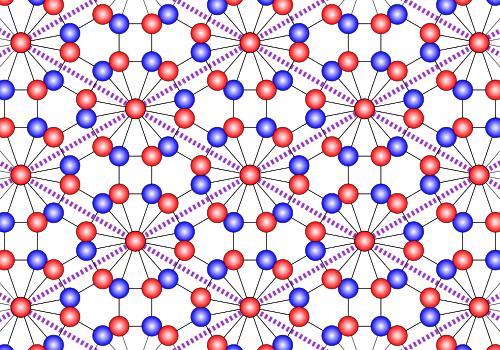

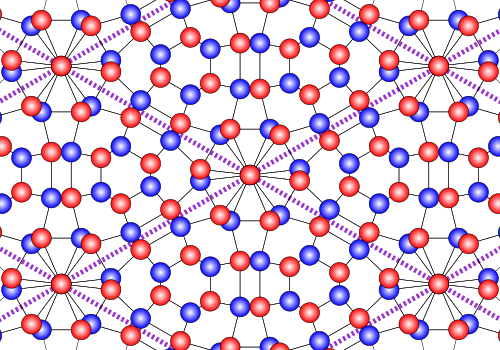

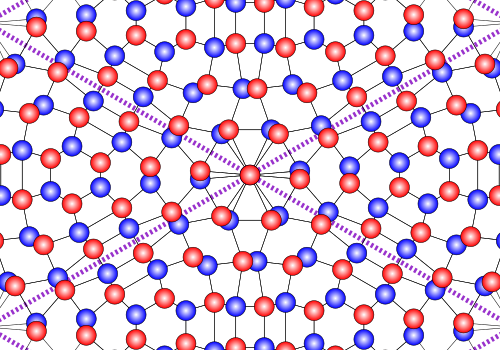

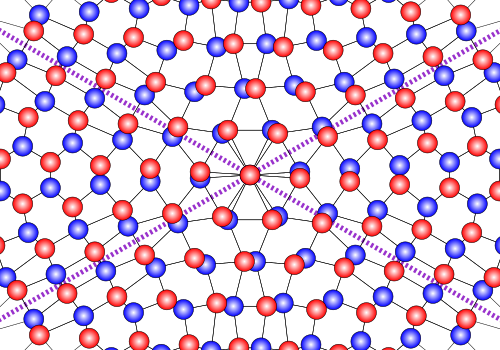

In [3]:
width, height = 10, 7
for index in range(1, 5):
    drawing = draw.Drawing(width, height, origin="center")
    md = moire.Bilayer(index+1, index)
    lattice = md.lattice(width, height, NN_interlayer=True)
    drawing.append(lattice.draw_unit_cell(stroke='darkorchid', stroke_width=0.1, stroke_dasharray="0.05,0.05"))
    drawing.append(lattice.draw_lattice())
    drawing.setRenderSize(500)
    glue("fig:lattice_n="+str(index), drawing)

Now we have a flexible description of the structure of the bilayer with all nearest neighbors for both the inter- and intralayer coupling. We show the interlayer nearest neighbors for selected values of $n$ with $m$ equal to $n+1$:

````{tabbed} Bilayer for $n=1$
```{glue:figure} fig:lattice_n=1
:name: fig:lattice_n=1
Supercell for $n=1$ and $m=2$, only one corner atom is included in unit cell.
````
````{tabbed} Bilayer for $n=2$
```{glue:figure} fig:lattice_n=2
:name: fig:lattice_n=2
Supercell for $n=2$ and $m=3$, only one corner atom is included in unit cell.
````
````{tabbed} Bilayer for $n=3$
```{glue:figure} fig:lattice_n=3
:name: fig:lattice_n=3
Supercell for $n=2$ and $m=3$, only one corner atom is included in unit cell.
```
````
````{tabbed} Bilayer for $n=4$
```{glue:figure} fig:lattice_n=4
:name: fig:lattice_n=4
Supercell for $n=2$ and $m=3$, only one corner atom is included in unit cell.
````

## Interlayer hopping

The interlayer hopping is significantly more complicated then the intralayer hopping. Each pair of atoms can have a potentially arbitrary distance and angle in the $xy$ plane. That we know what these are does not garantuee that we can find the corresponding hopping strength using symmetries.

### $\mathbf K$-points hoppings

Wang et al. {cite}`interlayer_coupling` discuss bilayers where the layers have a relative displacement of $\mathbf r_0$ in the $xy$ plane. They investigate interlayer hoppings between $\mathbf K$ points, where the conduction band consists of the $d_{z^2}$ orbital and the valence band of a linear combination of the $d_{xy}$ and $d_{x^2-y^2}$ orbitals. They conclude that under first approximation the hopping between the band $n$ and $n'$ with wavevectors $\mathbf k$ and $\mathbf k'$ is:

$$
\langle n, \mathbf k|H|n',\mathbf k'\rangle = \text e^{\tau\mathbf K\cdot\mathbf r_0}\sum_{\mathbf \kappa\mathbf \kappa'}\delta_{\mathbf k-\mathbf k', \tau \mathbf \kappa-\tau'\mathbf \kappa'}\tau_{nn'}(\tau \mathbf \kappa+\mathbf k)\text e^{-i\tau\mathbf \kappa\cdot\mathbf r_0}
$$

with $\tau^i$ a sign indicating the valley. The summation is over all $\mathbf K$ points in the respective Brillouin zones.

The interest of this equation is that it allows us to extract hoppings for all $\mathbf r_0$. The authors themselves suggest that locally a Moiré lattice with small twist angle is just a normal lattice with some local displacement $\mathbf r_0$. There is however no apparent method to translate this result back to a microscopic model.

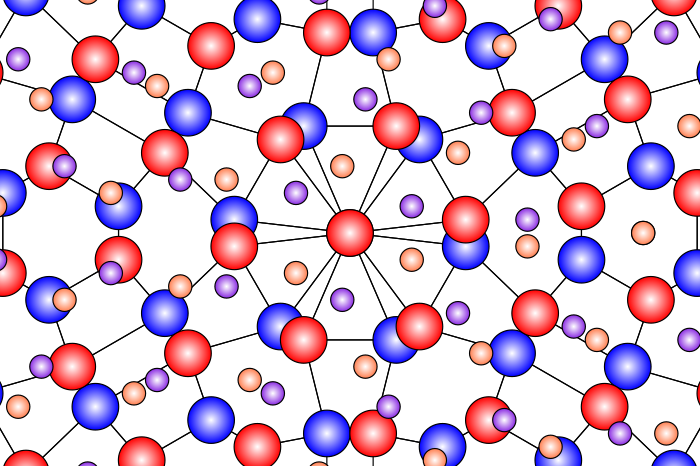

In [4]:
width, height = 6, 4
drawing = draw.Drawing(width, height, origin="center")
md = moire.Bilayer(2, 3)
lattice = md.lattice(width, height, NN_interlayer=True, add_Se2=True)
drawing.append(lattice.draw_lattice())
drawing.setRenderSize(700)
glue("fig:lattice_with_Se2", drawing)

### Mircoscopic model

````{sidebar} Interference of hopping terms
```{glue:figure} fig:lattice_with_Se2
:name: fig:latticewithSe2
Superlattice with selenide atoms.
```
````

There is a reason why the micropscopic model does not play nice. The selenide atoms in both layers interfere with the interlayer hopping trajectories. Locally, the placement of these atoms can seem random, although obeying the lattice symmetries, see {numref}`fig:latticewithSe2`. 

We have no reason to believe that a hopping going straight through two selenide atoms will be equivalent to one completely forgoing them. We have seen for the monolayer that the existence of the symmetry breaking selenide atoms allowed coupling between the $d_{xy}$ and the other two $d$ orbitals. This coupling has the same order of magnitude as the other couplings, indicating that their presence cannot be ignored. We stress that this holds true for the microscopic model, a continuum model ignores microscopic perturbations since we stay close to the $\mathf K$ points. 

We suggest circumventing this problem by restricting interlayer NN to atoms with an $xy$ distance of half of the atomic distance. Since the distance to the selenide atoms is always greater than half we can ignore their contribution to these hoppings.